In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carico il dataset per vedere le prime righe e riassumere la sua struttura
file_path = 'Champions League data with ELO.csv'
data = pd.read_csv(file_path)

# Visualizzo le prime righe e le informazioni generali sul dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()

(data_head, data_info, data_description)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 282: invalid start byte

In [ ]:
#Tento di leggere il CSV con una codifica diversa: ISO-8859-1
try:
    data_iso = pd.read_csv(file_path, encoding='ISO-8859-1')
except Exception as e_iso:
    error_iso = str(e_iso)

# Tento di leggere il CSV con un'altra codifica: Windows-1252
try:
    data_windows = pd.read_csv(file_path, encoding='Windows-1252')
except Exception as e_windows:
    error_windows = str(e_windows)

# Verifico quali, eventualmente, sono andati a buon fine e riassumo i dati
if 'data_iso' in locals():
    data_head_iso = data_iso.head()
    data_info_iso = data_iso.info()
    data_description_iso = data_iso.describe()
    successful_encoding = 'ISO-8859-1'
elif 'data_windows' in locals():
    data_head_windows = data_windows.head()
    data_info_windows = data_windows.info()
    data_description_windows = data_windows.describe()
    successful_encoding = 'Windows-1252'
else:
    data_head_iso, data_head_windows, error_iso, error_windows, successful_encoding = None, None, error_iso, error_windows, None

(data_head_iso, data_info_iso, data_description_iso, data_head_windows, data_info_windows, data_description_windows, error_iso, error_windows, successful_encoding)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           640 non-null    int64  
 1   Team             640 non-null    object 
 2   Place            640 non-null    int64  
 3   Finish           640 non-null    int64  
 4   ELO              640 non-null    float64
 5   Heritgae_Score   640 non-null    int64  
 6   PPM              640 non-null    float64
 7   GF               640 non-null    float64
 8   GA               640 non-null    float64
 9   Wins             640 non-null    int64  
 10  Finals           640 non-null    int64  
 11  SF               640 non-null    int64  
 12  QF               640 non-null    int64  
 13  R16              640 non-null    int64  
 14  Total            640 non-null    int64  
 15  Section          640 non-null    object 
 16  Squad            640 non-null    object 
 17  MP              

NameError: name 'data_info_windows' is not defined

In [ ]:
data_iso.head()

,Season,Team,Place,Finish,ELO,Heritgae_Score,PPM,GF,GA,Wins,...,Pts,xG,xGA,xGD,xGD/90,Attendance,Top Team Scorer,Goalkeeper,Notes,Lookup
0,2023,Manchester City,1,1,2024.311279,93,2.230769,2.461538,0.384615,0,...,29,26.5,10.5,16.0,1.23,63639.0,Erling Haaland - 12,Ederson,NaN,Manchester City2023
1,2023,Inter,2,2,1841.519287,118,1.846154,1.461538,0.846154,1,...,24,17.9,15.1,2.8,0.22,71415.0,Edin Deko - 4,André Onana,NaN,Inter2023
2,2023,Real Madrid,4,3,1954.578003,577,2.166667,2.166667,1.083333,7,...,26,22.3,15.9,6.4,0.53,58761.0,Vinicius Júnior - 7,Thibaut Courtois,NaN,Real Madrid2023
3,2023,Milan,4,4,1838.609741,206,1.500000,1.250000,0.916667,2,...,18,16.5,14.6,1.9,0.16,72546.0,Olivier Giroud - 5,Mike Maignan,NaN,Milan2023
4,2023,Bayern Munich,8,5,2014.212891,388,2.500000,2.200000,0.600000,3,...,25,19.4,10.9,8.4,0.84,75000.0,"Leroy Sané, Eric Maxim Choupo-Moting - 4",Yann Sommer,NaN,Bayern Munich2023


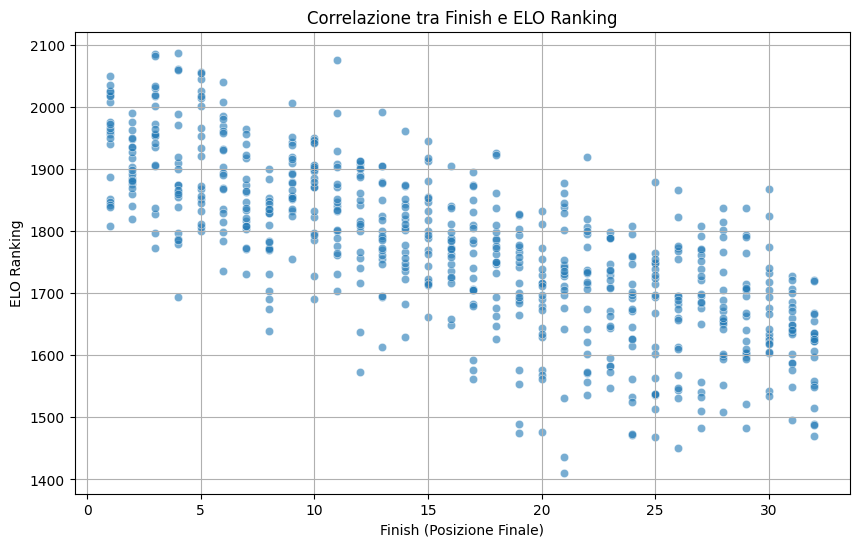

In [ ]:
# Traccio la relazione tra Finish (posizione finale nella competizione) e ranking ELO con gli assi invertiti.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Finish', y='ELO', data=data_iso, alpha=0.6)

plt.title('Correlazione tra Finish e ELO Ranking')
plt.xlabel('Finish (Posizione Finale)')
plt.ylabel('ELO Ranking')

plt.grid(True)
plt.show()


Questo grafico consente di vedere come squadre con un ranking ELO più alto tendono generalmente a classificarsi meglio nelle competizioni.


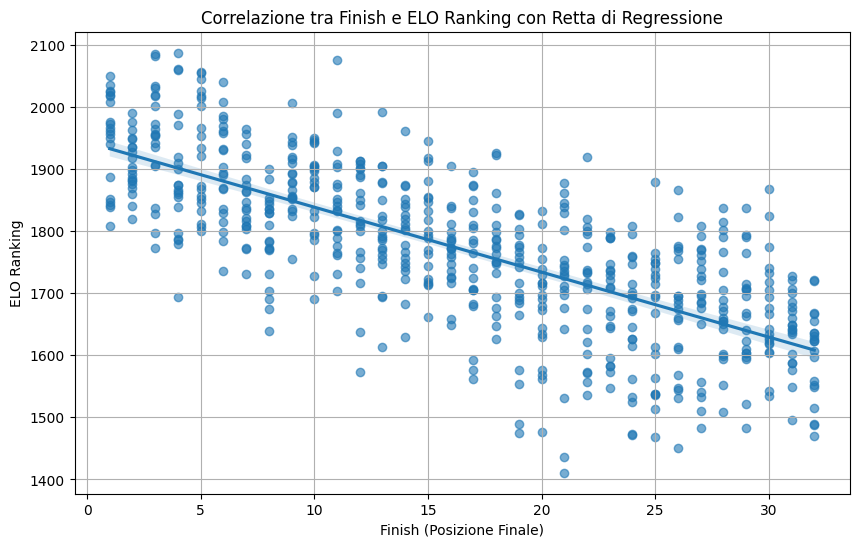

In [ ]:
# Aggiungo una retta di regressione al grafico a dispersione di Finish vs ELO
plt.figure(figsize=(10, 6))
sns.regplot(x='Finish', y='ELO', data=data_iso, scatter_kws={'alpha':0.6})

plt.title('Correlazione tra Finish e ELO Ranking con Retta di Regressione')
plt.xlabel('Finish (Posizione Finale)')
plt.ylabel('ELO Ranking')

plt.grid(True)
plt.show()


Questa retta aiuta a visualizzare meglio la tendenza generale che mostra come un ranking ELO più alto sia associato a posizioni migliori nella competizione. La pendenza negativa della retta di regressione conferma ulteriormente la correlazione inversa tra le due variabili

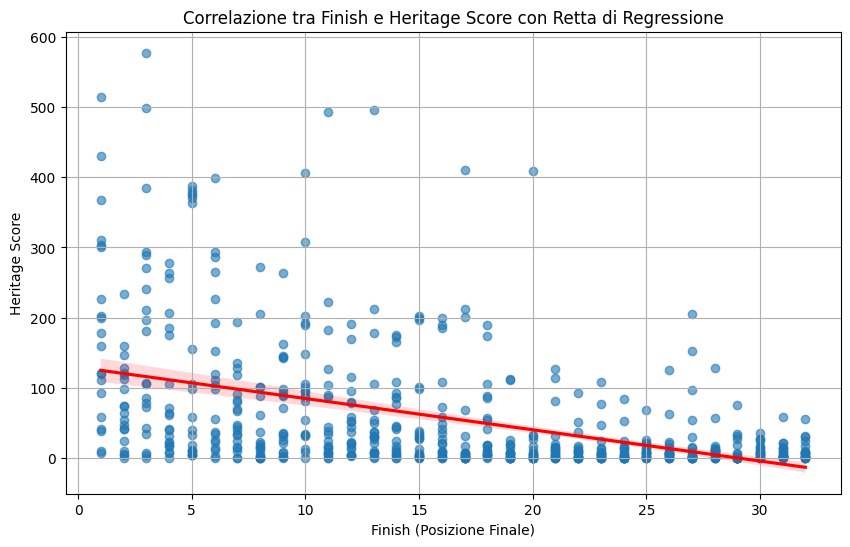

L'R quadro vale: 0.2038491200312993


In [ ]:
# Traccio il risultato finale rispetto all'Heritage_Score con una retta di regressione e calcolo dell'R-quadro.
plt.figure(figsize=(10, 6))
reg_plot = sns.regplot(x='Finish', y='Heritgae_Score', data=data_iso, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})


from sklearn.metrics import r2_score

# Ottengo i dati della retta di regressione
reg_line_x = reg_plot.get_lines()[0].get_xdata()
reg_line_y = reg_plot.get_lines()[0].get_ydata()

# Calcolo l'R-quadro
r_squared = r2_score(data_iso['Heritgae_Score'], np.interp(data_iso['Finish'], reg_line_x, reg_line_y))

plt.title('Correlazione tra Finish e Heritage Score con Retta di Regressione')
plt.xlabel('Finish (Posizione Finale)')
plt.ylabel('Heritage Score')
plt.grid(True)
plt.show()

print("L'R quadro vale:", r_squared)
